# 通过多层感知机(MLP)来预测泰坦尼克号乘客的生存概率

In [48]:
import numpy as np
import pandas as pd
data_path='data/titanic3.xls'

### 乘客数据是个Excel格式的数据，这里要用pandas的read_excel方法将它读进来

In [49]:
df=pd.read_excel(data_path)

### 这里将数据展示一下，这里只展示前五行的数据

In [50]:
df[:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,28.0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,27.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 在上述的字段中survived表示的是生存与否，在上述字段中我们认为有些字段的值对我们预测乘客的生存与否是没有太大关联的比如船票号码ticket、cabin(船位号码)。所以我们要将这些数据忽略掉。同时这里也有个小技巧。我们要处理的是survived字段，这里最好将其放在第一列上以便后面的处理。

In [51]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [52]:
cols=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']

In [53]:
df=df[cols]

In [54]:
df[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,28.0,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,27.0,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S


### 这里要强调一下机器学习数据处理中常见的情形，对于数值数据为空的情况我们必须将这些数值填充通常填为平均值，对于二分类的姓名文字我们要将其转换为0和1。对于分类字段我们还必须使用One-hot Encoding进行转换。如age,fare有好多为空。embarked有C、Q、S总共有三类，我们必须使用One-hot Encoding编码转换一下才能送进机器学习中进行学习

In [55]:
#这里可以看看有多少的null值（无数据）的字段
df.isnull().sum()

survived      0
name          0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

### 从上表中我们可以看出age这个字段空值达到了263个，其他的都有空值。因为在后续进行深度学习训练时字段数据必须是数字，不能为null值，最简单的方法是填上0，但是0不符合实际场景，所以这里将null值替换为字段的平均值，这样比较符合实际情况

#### 这里将null值数据转换为平均值也非常的方便使用下面的两个方法就可以

In [34]:
age_mean=df['age'].mean()
df['age']=df['age'].fillna(age_mean)

In [35]:
fare_mean=df['fare'].mean()
df['fare']=df['fare'].fillna(fare_mean)

#### 对于性别为字符，这里我们要转换为0和1。这里必须转换为数字才能送进神经网络中进行学习。这里也非常的简单这里使用map方法将"female"转换为0，"male"转换为1

In [36]:
df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)

#### 对embarked字段是个类别的我们要将其转换为一位有效编码转换。这里使用get_dummies()进行转换即可
#### get_dummies(data,columns) data要转换的DataFrame，columns要转换的字段

In [37]:
x_OneHot_df=pd.get_dummies(data=df,columns=['embarked'])

In [38]:
#转换后的数据为
x_OneHot_df

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",1,0,29.000000,0,0,211.3375,0,0,1
1,1,"Allison, Master. Hudson Trevor",1,1,28.000000,1,2,151.5500,0,0,1
2,0,"Allison, Miss. Helen Loraine",1,0,27.000000,1,2,151.5500,0,0,1
3,0,"Allison, Mr. Hudson Joshua Creighton",1,1,30.000000,1,2,151.5500,0,0,1
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,0,25.000000,1,2,151.5500,0,0,1
5,1,"Anderson, Mr. Harry",1,1,48.000000,0,0,26.5500,0,0,1
6,1,"Andrews, Miss. Kornelia Theodosia",1,0,63.000000,1,0,77.9583,0,0,1
7,0,"Andrews, Mr. Thomas Jr",1,1,39.000000,0,0,0.0000,0,0,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,0,53.000000,2,0,51.4792,0,0,1
9,0,"Artagaveytia, Mr. Ramon",1,1,71.000000,0,0,49.5042,1,0,0


### 因为后续要进行深度学习训练，所以必须将DataFrame转换为Array才能进行训练，将DataFrame转换为Array也很简单通过.values即可

In [39]:
dataset=x_OneHot_df.values

In [40]:
dataset.shape

(1309, 11)

### 这里我们将数据可视化一下，这里查看前两项数据

In [41]:
dataset[:2]

array([[1, 'Allen, Miss. Elisabeth Walton', 1, 0, 29.0, 0, 0, 211.3375,
        0, 0, 1],
       [1, 'Allison, Master. Hudson Trevor', 1, 1, 28.0, 1, 2, 151.55, 0,
        0, 1]], dtype=object)

### 其中第0个字段为label，第一个字段及以后的字段是features。我们也可以通过python的切片来提取

In [42]:
Label=dataset[:,0]
Features=dataset[:,1:]

In [43]:
Label[:2]

array([1, 1], dtype=object)

In [44]:
Features[:2]

array([['Allen, Miss. Elisabeth Walton', 1, 0, 29.0, 0, 0, 211.3375, 0,
        0, 1],
       ['Allison, Master. Hudson Trevor', 1, 1, 28.0, 1, 2, 151.55, 0, 0,
        1]], dtype=object)

### 从以上的数据可以看出，因为数值特征字段单位不同，例如年龄29岁、运费211元等，数值差异很大，没有一个共同的标准。这时候我们要使用标准化让所有的数值都在0和1之间。即均值为0方差为1即数据标准化。我们都知道神经网络喜欢小数据。我们将使用sklearn这个库对数据进行标准化

In [45]:
from sklearn import preprocessing

In [46]:
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))

### 这里只需将特征标准化一下即可，我们将特征数据传进去即可

In [47]:
scaledFeatures=minmax_scale.fit_transform(Features)

ValueError: could not convert string to float: 'Allen, Miss. Elisabeth Walton'

In [24]:
scaledFeatures[:2]

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.34864273, 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

### 下面就是划分数据集，我们将数据划分为训练数据和测试数据

#### 这里我们随机的选取0.8的数据作为训练数据，其余的作为测试数据

In [56]:
import numpy as np

In [57]:
msk=np.random.rand(len(df))<0.8
train=df[msk]
test=df[~msk]

In [58]:
print('total:{},train:{},test:{}'.format(len(df),len(train),len(test)))

total:1309,train:1052,test:257


### 这里我们要将数据预处理封装成一个函数以便后面调用

In [59]:
def preprocessData(df):
    df=df.drop(['name'],axis=1)
    age_mean=df['age'].mean()
    df['age']=df['age'].fillna(age_mean)
    fare_mean=df['fare'].mean()
    df['fare']=df['fare'].fillna(fare_mean)
    df['sex']=df['sex'].map({'female':0,'male':1}).astype(int)
    x_OneHot_df=pd.get_dummies(data=df,columns=['embarked'])
    ndarray=x_OneHot_df.values
    Features=ndarray[:,1:]
    Label=ndarray[:,0]
    minmax_scal=preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures=minmax_scal.fit_transform(Features)
    return scaledFeatures,Label

In [60]:
train_features,train_label=preprocessData(train)
test_features,test_lable=preprocessData(test)

In [61]:
train_features

array([[0.        , 0.        , 0.36116884, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.34864273, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.33611663, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.37660384, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.32985358, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.36116884, ..., 0.        , 0.        ,
        1.        ]])

In [62]:
train_label[:2]

array([1., 1.])

### 建立模型

In [63]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [64]:
model=Sequential()
model.add(Dense(128,input_dim=9,kernel_initializer='uniform',activation='relu'))
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid'))

In [65]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
train_history=model.fit(train_features,train_label,validation_split=0.1,epochs=100,batch_size=32,verbose=1)

Train on 946 samples, validate on 106 samples
Epoch 1/100
946/946 [==============================] - 0s 395us/step - loss: 0.6817 - acc: 0.6078 - val_loss: 0.6232 - val_acc: 0.7736
Epoch 2/100
946/946 [==============================] - 0s 38us/step - loss: 0.6081 - acc: 0.6755 - val_loss: 0.4895 - val_acc: 0.7830
Epoch 3/100
946/946 [==============================] - 0s 44us/step - loss: 0.5247 - acc: 0.7643 - val_loss: 0.4528 - val_acc: 0.8019
Epoch 4/100
946/946 [==============================] - 0s 48us/step - loss: 0.4937 - acc: 0.7706 - val_loss: 0.4390 - val_acc: 0.8019
Epoch 5/100
946/946 [==============================] - 0s 52us/step - loss: 0.4865 - acc: 0.7717 - val_loss: 0.4375 - val_acc: 0.8019
Epoch 6/100
946/946 [==============================] - 0s 56us/step - loss: 0.4794 - acc: 0.7738 - val_loss: 0.4338 - val_acc: 0.7925
Epoch 7/100
946/946 [==============================] - 0s 58us/step - loss: 0.4816 - acc: 0.7875 - val_loss: 0.4336 - val_acc: 0.7925
Epoch 8/100
946

946/946 [==============================] - 0s 48us/step - loss: 0.4502 - acc: 0.7939 - val_loss: 0.4326 - val_acc: 0.8396
Epoch 62/100
946/946 [==============================] - 0s 49us/step - loss: 0.4483 - acc: 0.7960 - val_loss: 0.4235 - val_acc: 0.8396
Epoch 63/100
946/946 [==============================] - 0s 42us/step - loss: 0.4467 - acc: 0.8023 - val_loss: 0.4209 - val_acc: 0.8302
Epoch 64/100
946/946 [==============================] - 0s 46us/step - loss: 0.4480 - acc: 0.8023 - val_loss: 0.4248 - val_acc: 0.7925
Epoch 65/100
946/946 [==============================] - 0s 47us/step - loss: 0.4500 - acc: 0.8013 - val_loss: 0.4266 - val_acc: 0.8019
Epoch 66/100
946/946 [==============================] - 0s 42us/step - loss: 0.4457 - acc: 0.8044 - val_loss: 0.4261 - val_acc: 0.8019
Epoch 67/100
946/946 [==============================] - 0s 47us/step - loss: 0.4458 - acc: 0.8034 - val_loss: 0.4229 - val_acc: 0.7925
Epoch 68/100
946/946 [==============================] - 0s 45us/step

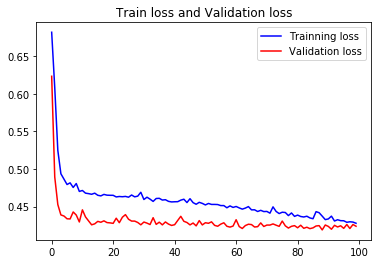

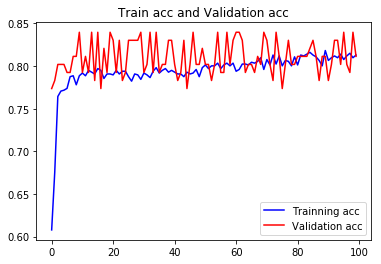

In [67]:
#将数据可视化一下
import matplotlib.pyplot as plt
loss=train_history.history['loss']
val_loss=train_history.history['val_loss']
acc=train_history.history['acc']
val_acc=train_history.history['val_acc']
epochs=range(0,len(loss))
plt.title("Train loss and Validation loss")
plt.plot(epochs,loss,'b',label='Trainning loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.legend(loc='best')
plt.figure()
plt.title("Train acc and Validation acc")
plt.plot(epochs,acc,'b',label='Trainning acc')
plt.plot(epochs,val_acc,'r',label='Validation acc')
plt.legend(loc='best')
plt.show()

In [312]:
scores=model.evaluate(test_features,test_lable)

264/264 [==============================] - 0s 25us/step


In [313]:
scores[1]

0.8143939393939394

### 接下来我们要插入相关的数据来进行预测

In [314]:
Jack=pd.Series([1,'Jack',3,'male',23,1,0,5.0000,'S'])
Rose=pd.Series([0,'Rose',1,'female',20,1,0,100.000,'S'])

### 使用pd.DataFrame创建Pandas DataFrame 加入上述数据

In [316]:
JR_df=pd.DataFrame([list(Jack),list(Rose)],columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])

### 我们要将JR_df加入到df进行预测，所以要添加

In [317]:
df=pd.concat([df,JR_df])

In [318]:
df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,Jack,3,male,23.0,1,0,5.0,S
1,0,Rose,1,female,20.0,1,0,100.0,S


## 这点一定要注意，因为Jack和Rose的数据是后来加入的必须在此进行数据预处理才能预测

In [319]:
all_Feature,Label=preprocessData(df)

In [320]:
all_probalility=model.predict_classes(all_Feature)

In [321]:
all_probalility[:10]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]], dtype=int32)

### 接下来我们将df（姓名与所有的特征字段）与all_probality整合产生新的df

In [322]:
pd=df
pd.insert(len(df.columns),'probability',all_probalility)

In [323]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,Jack,3,male,23.0,1,0,5.0,S,0
1,0,Rose,1,female,20.0,1,0,100.0,S,1


In [324]:
pd[:100]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0,0,0,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",1,male,28.0,1,2,151.5500,S,1
2,0,"Allison, Miss. Helen Loraine",1,female,27.0,1,2,151.5500,S,1
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S,1
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,1
5,1,"Anderson, Mr. Harry",1,male,48.0,0,0,26.5500,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",1,female,63.0,1,0,77.9583,S,1
7,0,"Andrews, Mr. Thomas Jr",1,male,39.0,0,0,0.0000,S,0
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",1,female,53.0,2,0,51.4792,S,1
9,0,"Artagaveytia, Mr. Ramon",1,male,71.0,0,0,49.5042,C,0
